# Used Car Exploratory Data Analysis

In [1]:
import opendatasets as od

In [2]:
download_url = 'https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data'
od.download(download_url)

Skipping, found downloaded files in ".\craigslist-carstrucks-data" (use force=True to force download)


In [3]:
filename = '.\craigslist-carstrucks-data/vehicles.csv'

# Data Preparation and Cleaning

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
df = pd.read_csv(filename)

In [6]:
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [7]:
#getting the info abt our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [8]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [9]:
#missing values in each columns
df1 = df.isna().sum().sort_values()
df1

id                   0
url                  0
region               0
region_url           0
price                0
state                0
image_url           68
posting_date        68
description         70
year              1205
transmission      2556
fuel              3013
odometer          4400
model             5277
lat               6549
long              6549
title_status      8242
manufacturer     17646
type             92858
paint_color     130203
drive           130567
VIN             161042
condition       174104
cylinders       177678
size            306361
county          426880
dtype: int64

<AxesSubplot:>

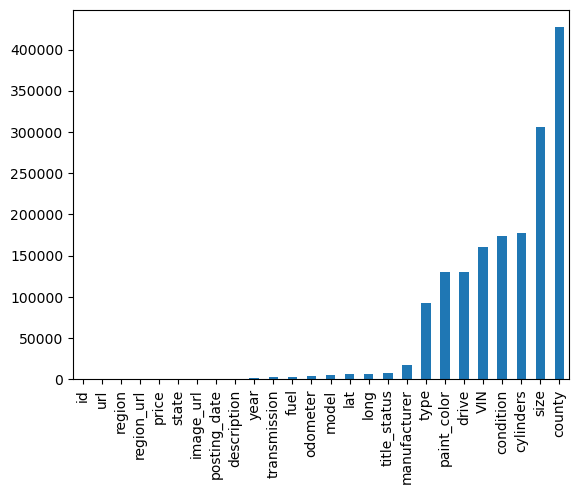

In [10]:
#plot the missing values on a bar graph
df1.plot(kind='bar')

<AxesSubplot:>

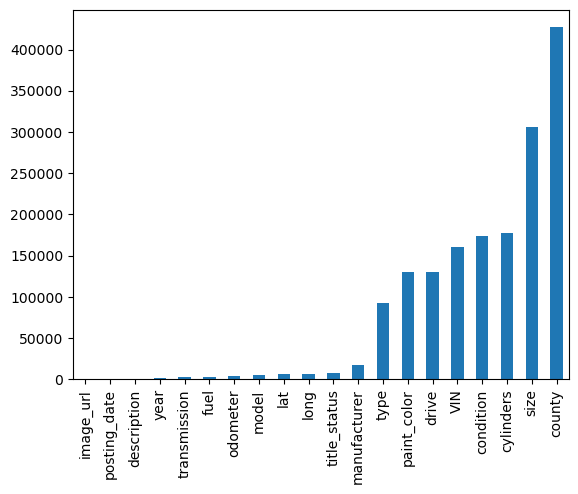

In [11]:
#without the zeroes value
df1[df1!=0].plot(kind='bar')

In [12]:
#as the missing values of columns county and size is too much we can drop these columns
df1 = df.drop(['county','size'],axis=1)

In [13]:
df1

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,VIN,drive,type,paint_color,image_url,description,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,1N4AA6AV6KC367801,fwd,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,7JR102FKXLG042696,fwd,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,1GYFZFR46LF088296,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,58ABK1GG4JU103853,fwd,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [14]:
#most common region where of used car on craglist
df1['region'].max()

'zanesville / cambridge'

In [15]:
#Converting posting_date from object to integer
df1["posting_date"] = pd.to_datetime(df1['posting_date'])

In [16]:
df1['posting_date']

0                               NaN
1                               NaN
2                               NaN
3                               NaN
4                               NaN
                    ...            
426875    2021-04-04 03:21:31-06:00
426876    2021-04-04 03:21:29-06:00
426877    2021-04-04 03:21:17-06:00
426878    2021-04-04 03:21:11-06:00
426879    2021-04-04 03:21:07-06:00
Name: posting_date, Length: 426880, dtype: object

In [17]:
#get the unique regions
regions = df['region'].unique()
regions

array(['prescott', 'fayetteville', 'florida keys',
       'worcester / central MA', 'greensboro', 'hudson valley',
       'medford-ashland', 'erie', 'el paso', 'bellingham',
       'skagit / island / SJI', 'la crosse', 'auburn', 'birmingham',
       'dothan', 'florence / muscle shoals', 'gadsden-anniston',
       'huntsville / decatur', 'mobile', 'montgomery', 'tuscaloosa',
       'anchorage / mat-su', 'fairbanks', 'kenai peninsula',
       'southeast alaska', 'flagstaff / sedona', 'mohave county',
       'phoenix', 'show low', 'sierra vista', 'tucson', 'yuma',
       'fort smith', 'jonesboro', 'little rock', 'texarkana',
       'bakersfield', 'chico', 'fresno / madera', 'gold country',
       'hanford-corcoran', 'humboldt county', 'imperial county',
       'inland empire', 'los angeles', 'mendocino county', 'merced',
       'modesto', 'monterey bay', 'orange county', 'palm springs',
       'redding', 'reno / tahoe', 'sacramento', 'san diego',
       'san luis obispo', 'santa barbara',

In [18]:
len(regions)

404

In [19]:
#regions with most car
region_cars = df['region'].value_counts()
region_cars

columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: region, Length: 404, dtype: int64

In [55]:
#state with most cars
state_cars = df['state'].value_counts()
state_cars

ca    50614
fl    28511
tx    22945
ny    19386
oh    17696
or    17104
mi    16900
nc    15277
wa    13861
pa    13753
wi    11398
co    11088
tn    11066
va    10732
il    10387
nj     9742
id     8961
az     8679
ia     8632
ma     8174
mn     7716
ga     7003
ok     6792
sc     6327
mt     6294
ks     6209
in     5704
ct     5188
al     4955
md     4778
nm     4425
mo     4293
ky     4149
ar     4038
ak     3474
la     3196
nv     3194
nh     2981
dc     2970
me     2966
hi     2964
vt     2513
ri     2320
sd     1302
ut     1150
wv     1052
ne     1036
ms     1016
de      949
wy      610
nd      410
Name: state, dtype: int64

In [20]:
#top 10 that regions
region_cars[:10]

columbus                    3608
jacksonville                3562
spokane / coeur d'alene     2988
eugene                      2985
fresno / madera             2983
orlando                     2983
bend                        2982
omaha / council bluffs      2982
new hampshire               2981
kennewick-pasco-richland    2981
Name: region, dtype: int64

<AxesSubplot:ylabel='region'>

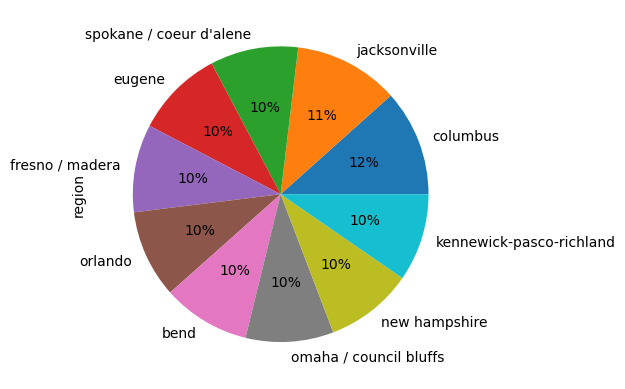

In [21]:
#plot the pie-chart for this
region_cars[:10].plot(kind="pie",autopct='%1.0f%%')

<AxesSubplot:>

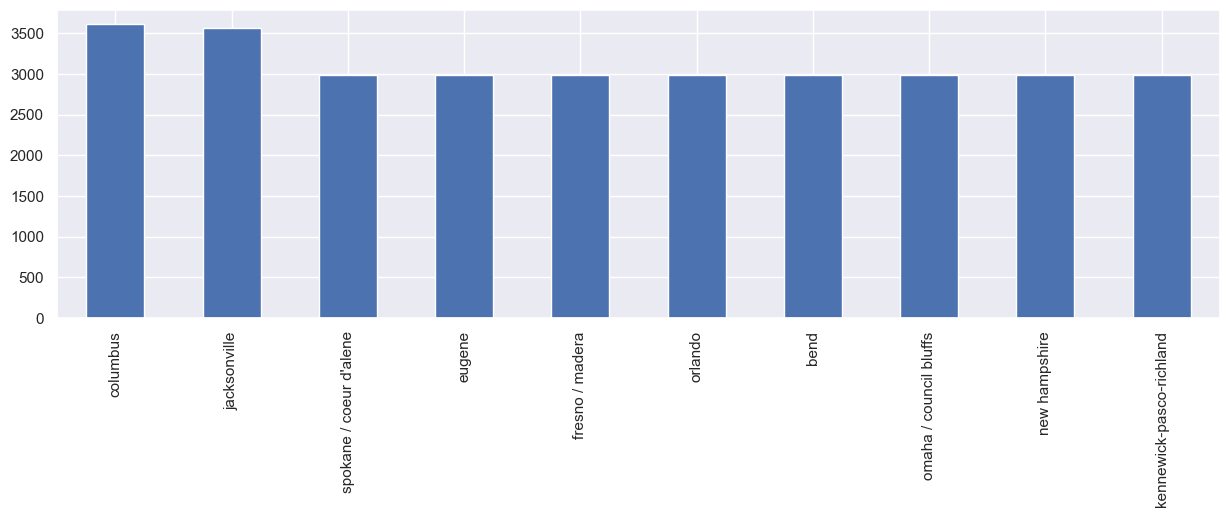

In [64]:
#plot the bar graph
region_cars[:10].plot(kind='bar')

#Region Compare
df_area = df1[(df1['lat']>24) & (df1['lat']<50) & (df1['long']>-130) & (df1['long']<-65)]
plt.figure(figsize=(18,10))
plt.title('Region Compare')
sns.scatterplot(data=df_area, x="long",y="lat",hue='type')
plt.show()

In [23]:
#lets check who are the major manufacturars
manuf = df['manufacturer'].unique()
manuf

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [24]:
#cars each manufactrer has made:
manu_cars = df['manufacturer'].value_counts()
manu_cars

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


In [25]:
# group by manufacturer and calculate avg price
manufacturer_price = df1.groupby('manufacturer',as_index=False)['price'].mean().round()
manufacturer_price

,manufacturer,price
0,acura,19843.0
1,alfa-romeo,28237.0
2,aston-martin,53495.0
3,audi,23575.0
4,bmw,26740.0
5,buick,36785.0
6,cadillac,19440.0
7,chevrolet,115676.0
8,chrysler,10443.0
9,datsun,15150.0


<AxesSubplot:xlabel='price', ylabel='manufacturer'>

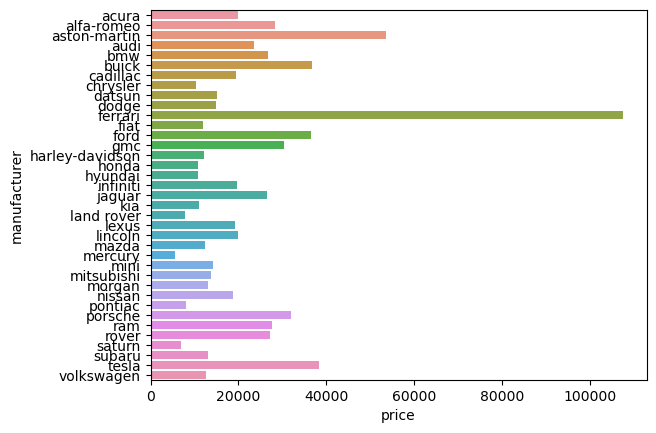

In [26]:
#barplot
sns.barplot(x='price', y='manufacturer',data=manufacturer_price[manufacturer_price.price < 110000], orient='h')

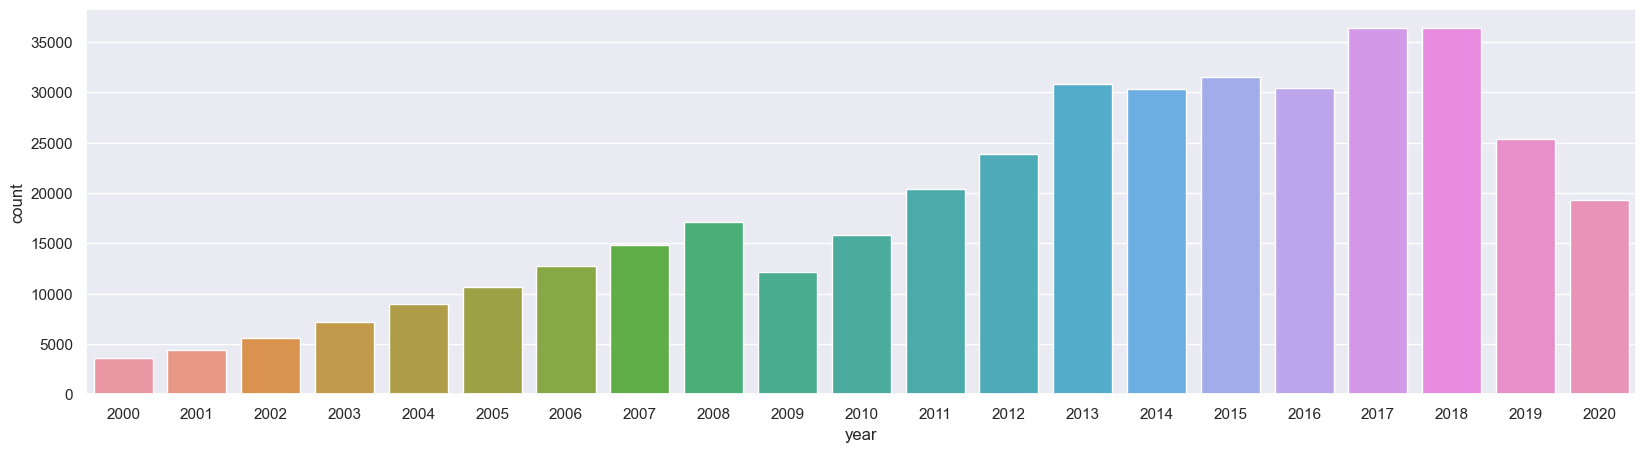

In [28]:
df_year = df[(df["year"]>1999) & (df["year"]<2021)].copy()
df_year["year"] = df_year["year"].astype(int)
plt.figure(figsize=(20,5))
sns.countplot(data= df_year,x="year")
plt.show()

Favorite model comparing ( Top 10 )

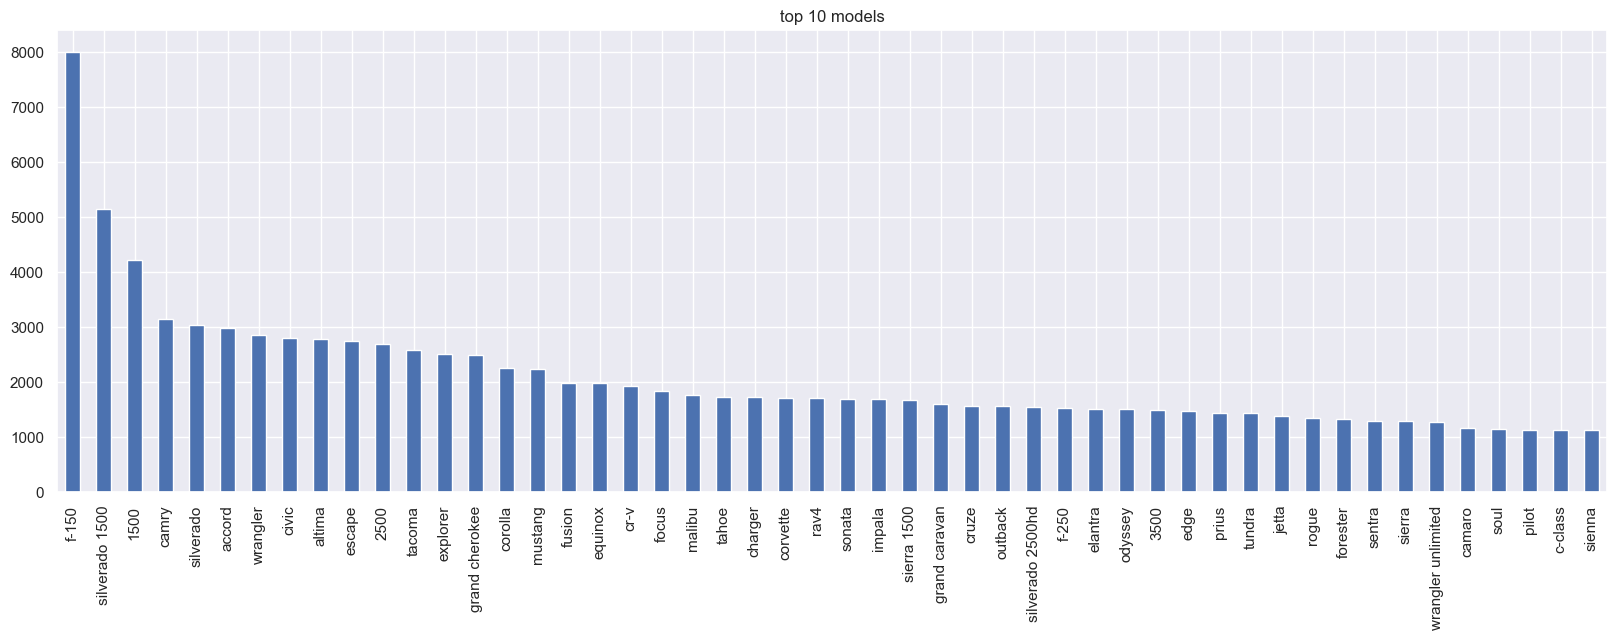

In [29]:
df1['model'].value_counts().head(50).plot.bar(figsize=(20,6),title="top 10 models")
plt.show()

<AxesSubplot:>

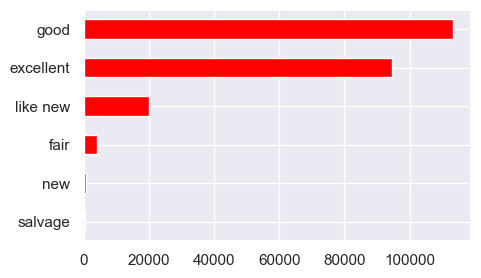

In [92]:
plt.figure(figsize=(5,3))
df_year['condition'].value_counts().sort_values().plot(kind='barh',color='red')

In [97]:
#group by condition and find avg price
condition_price = df1.groupby('condition',as_index=False)['price'].mean().sort_values('price')
condition_price

,condition,price
5,salvage,3605.534110
4,new,23657.266667
2,good,32545.203102
3,like new,36402.041978
0,excellent,51346.825953
1,fair,761090.005614


<AxesSubplot:xlabel='price', ylabel='condition'>

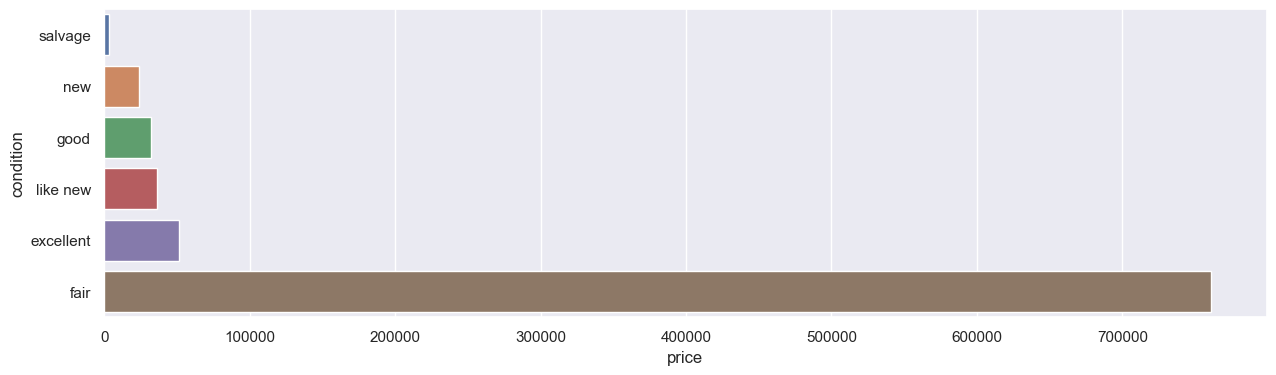

In [98]:
#plot
sns.barplot(x='price',y='condition',data=condition_price)

<AxesSubplot:xlabel='cylinders', ylabel='count'>

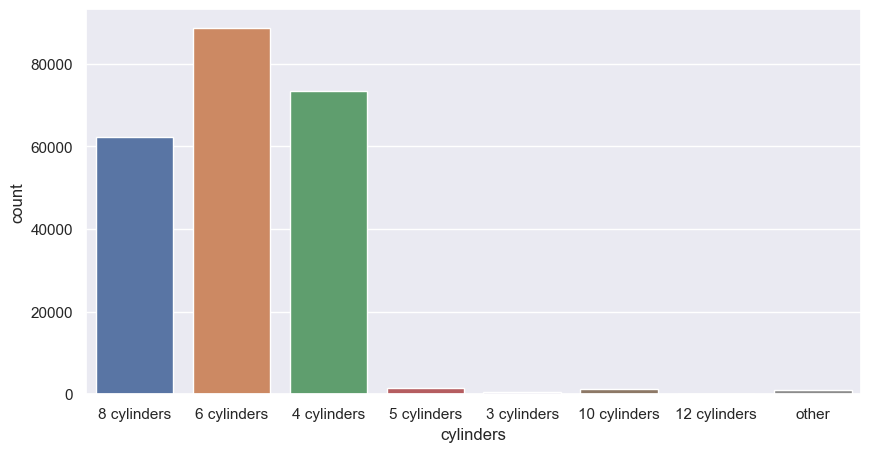

In [100]:
plt.figure(figsize=(10,5))
sns.countplot(x='cylinders',data=df_year)

In [103]:
#group by cylinders and find avg price
cylinders_price = df1.groupby('cylinders',as_index=False)['price'].mean().sort_values('price',ascending = False)
cylinders_price

,cylinders,price
6,8 cylinders,139595.722142
5,6 cylinders,58696.317058
1,12 cylinders,54299.382775
0,10 cylinders,21507.802062
7,other,17110.077812
2,3 cylinders,12296.996947
3,4 cylinders,10545.301370
4,5 cylinders,7842.779790


<AxesSubplot:xlabel='price', ylabel='cylinders'>

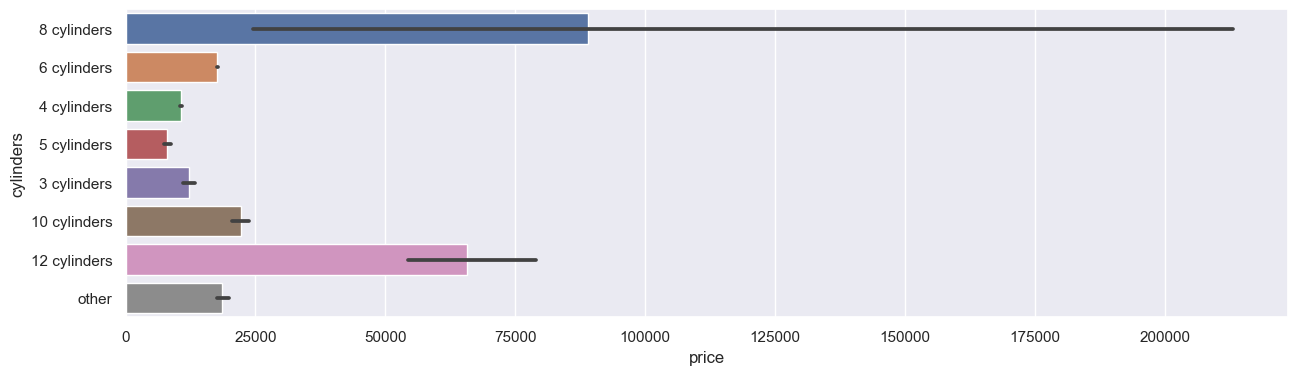

In [104]:
#plot
sns.barplot(x='price',y='cylinders',data=df_year)

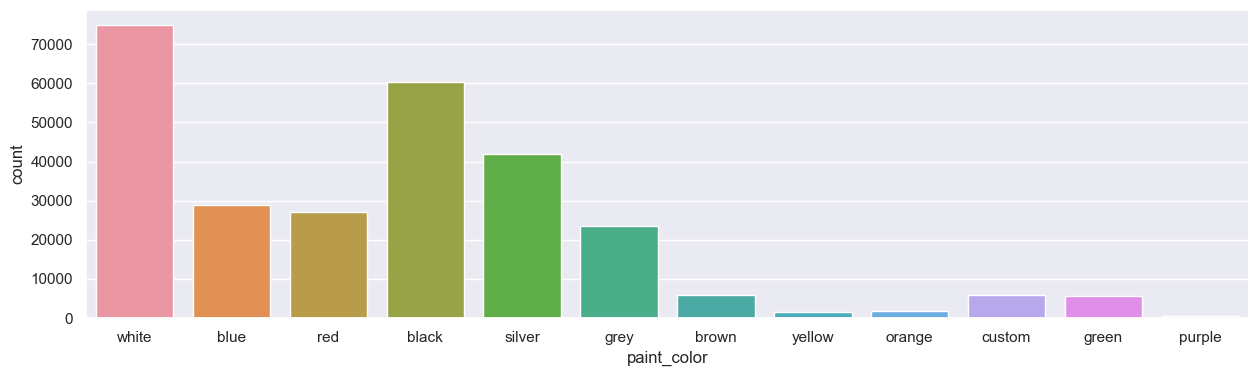

In [30]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_year,x="paint_color")
plt.show()

<AxesSubplot:xlabel='type', ylabel='count'>

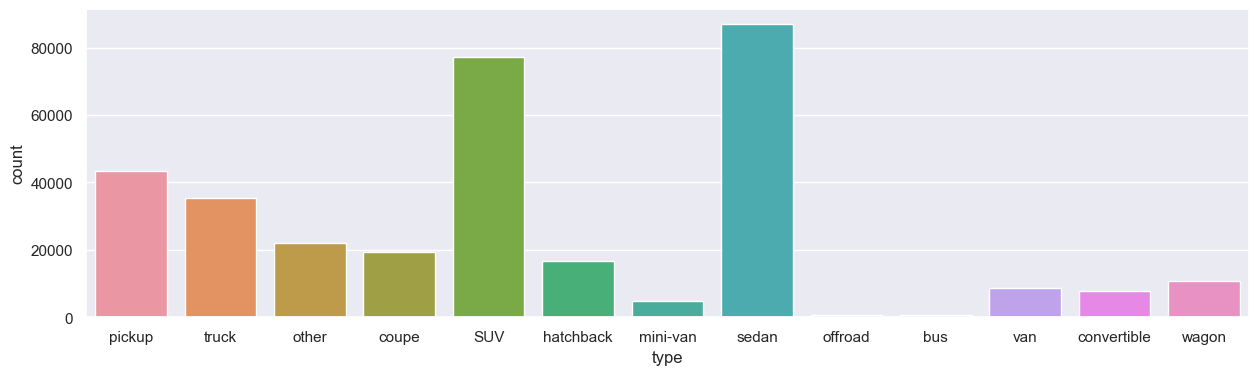

In [32]:
#Number of vehicles for sale on Craigslist by body type
plt.figure(figsize=(20,15))
sns.countplot(x='type',data=df1)

The most type is sedan, and next SUV pickup, truck type and then compare with condition.

In [ ]:
Compare what is the most common color of each type of vehical

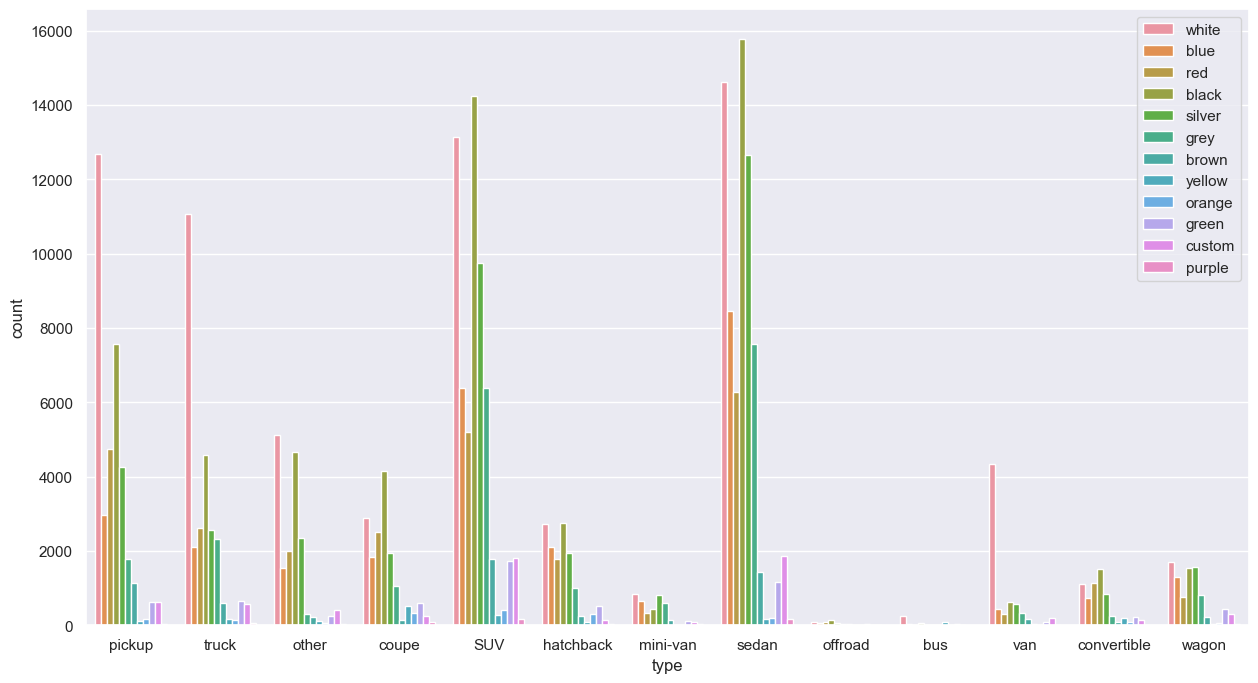

In [90]:
plt.figure(figsize=(15,8))
sns.countplot(x='type',hue='paint_color',data=df1)
plt.legend(loc="upper right")

Lets compare the type and condition

(-1.25, 1.25, -1.25, 1.25)

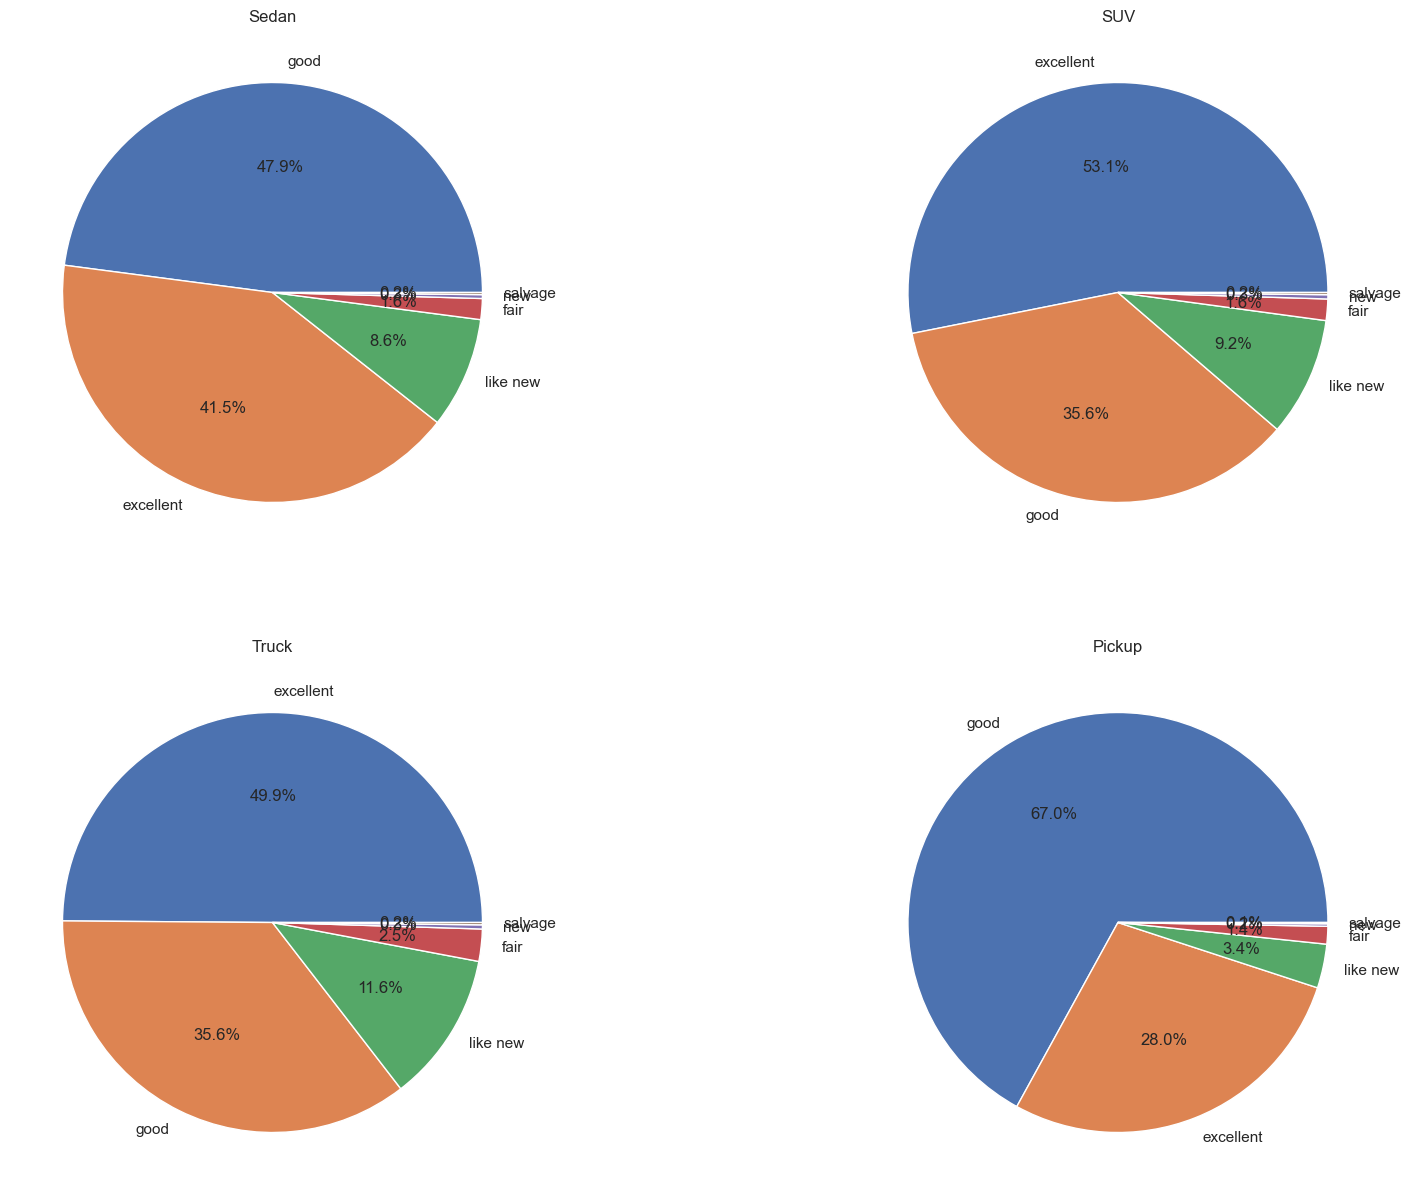

In [40]:
plt.figure(figsize=(20,15))
plt.subplot(221)
df_year["condition"][df_year["type"]=='sedan'].value_counts().plot.pie(autopct = '%.1f%%', title="Sedan")
plt.axis('off')

plt.subplot(222)
df_year["condition"][df_year["type"]=='SUV'].value_counts().plot.pie(autopct = '%.1f%%',title="SUV")
plt.axis('off')

plt.subplot(223)
df_year["condition"][df_year["type"]=='truck'].value_counts().plot.pie(autopct = '%.1f%%',title='Truck')
plt.axis('off')

plt.subplot(224)
df_year["condition"][df_year["type"]=='pickup'].value_counts().plot.pie(autopct = '%.1f%%',title='Pickup')
plt.axis('off')



<AxesSubplot:xlabel='type', ylabel='count'>

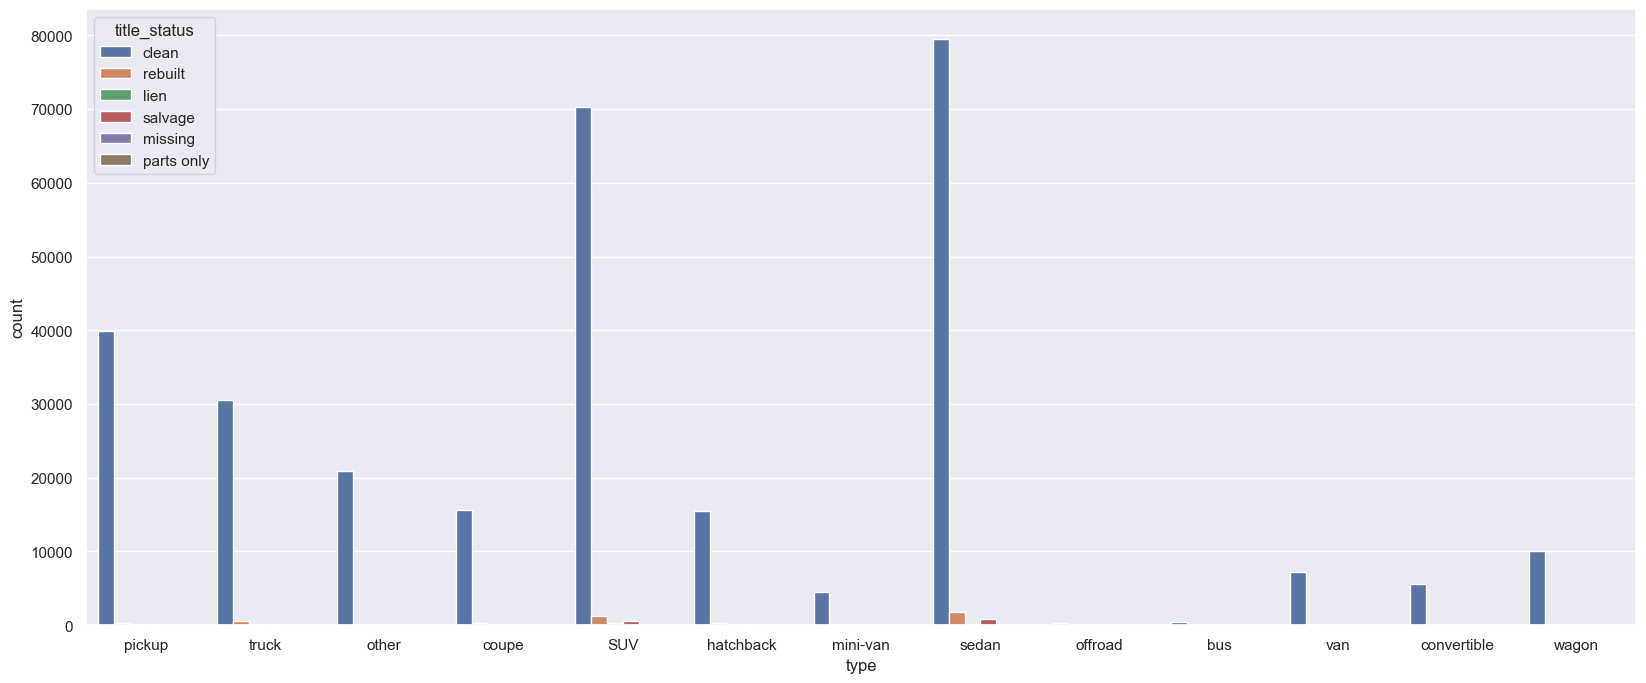

In [47]:
plt.figure(figsize=(20,8))
sns.countplot(data = df_year,x='type',hue='title_status')

 Compare type and transmission on vehicle

<AxesSubplot:xlabel='type', ylabel='count'>

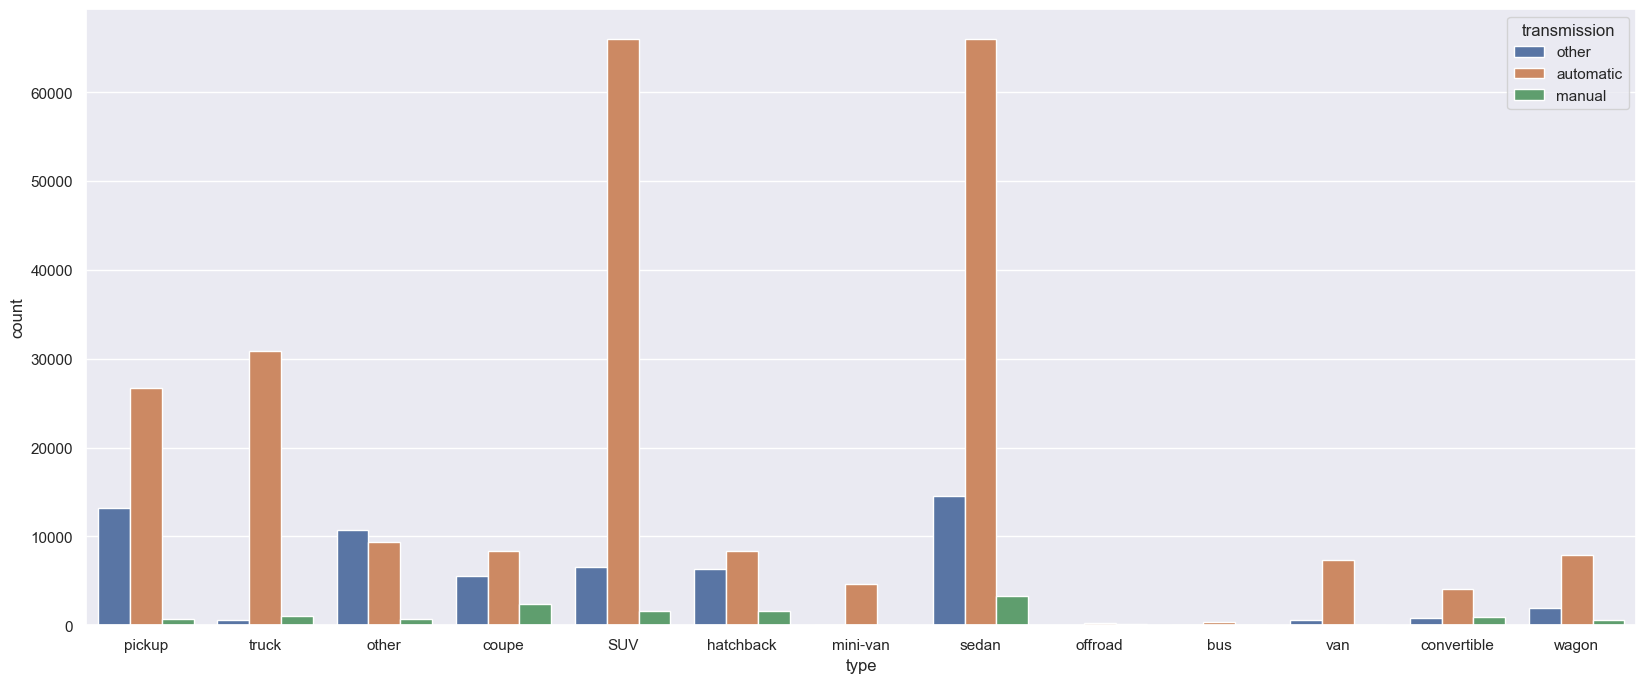

In [53]:
plt.figure(figsize=(20,8))
sns.countplot(data = df_year,x='type',hue='transmission')

In [79]:
mean_price = df_year.groupby('year',as_index=False)['price'].mean().round()
mean_price

,year,price
0,2000,1700951.0
1,2001,7505.0
2,2002,9582.0
3,2003,24268.0
4,2004,7505.0
5,2005,7951.0
6,2006,105033.0
7,2007,261163.0
8,2008,16994.0
9,2009,9072.0


<AxesSubplot:xlabel='year', ylabel='price'>

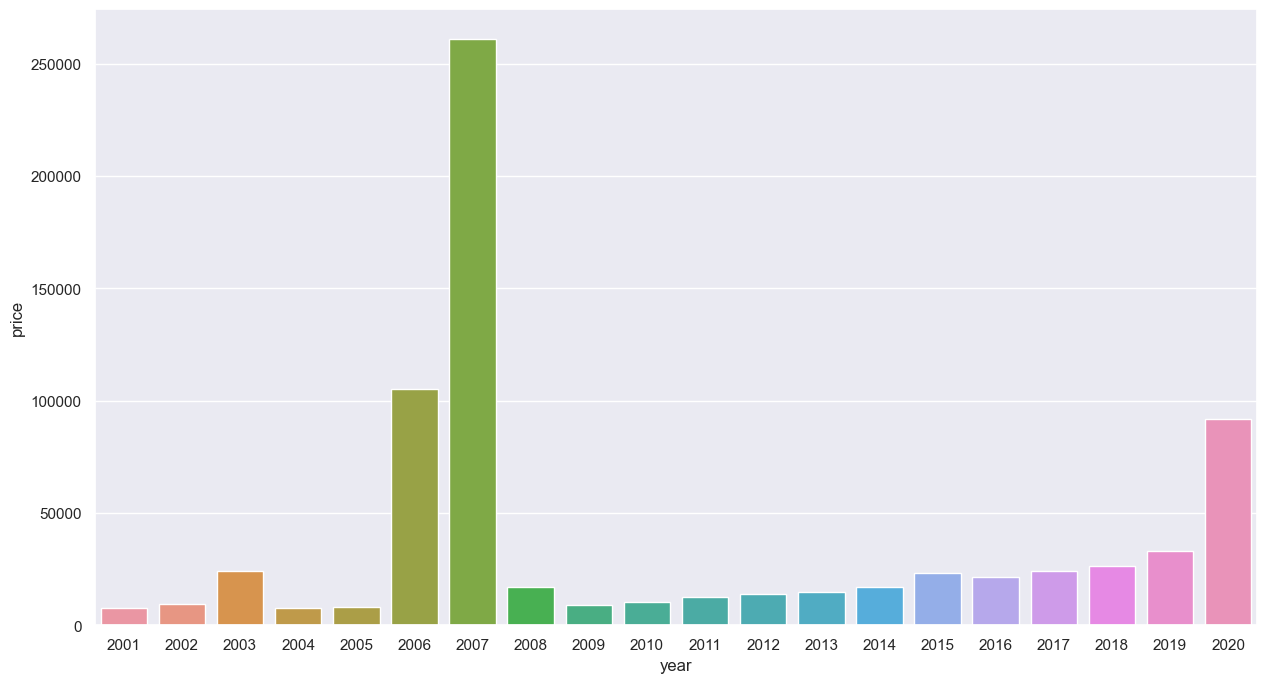

In [82]:
plt.figure(figsize=(15,8))
sns.barplot(x='year',y='price',data=mean_price[mean_price.price<1000000.0])